In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
sal_df = pd.read_csv('Dataset/Salary.csv')
sal_df.head()

,name,Age,Salary
0,A,40,6500
1,B,41,6300
2,C,43,6400
3,D,39,8000
4,E,36,15600


Text(0, 0.5, 'Salary')

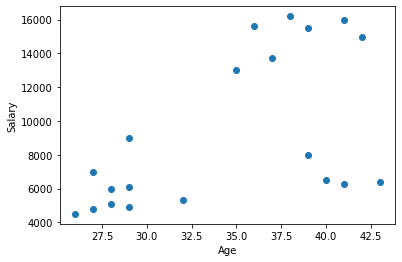

In [2]:
plt.scatter(sal_df.Age, sal_df['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')

In [3]:
km = KMeans(n_clusters=3)
predicted = km.fit_predict(sal_df[['Age', 'Salary']])
predicted

array([1, 1, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0])

Text(0, 0.5, 'salary')

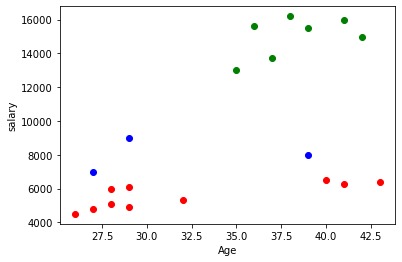

In [4]:
sal_df['cluster'] = predicted

sal_df1 = sal_df[sal_df.cluster==0]
sal_df2 = sal_df[sal_df.cluster==1]
sal_df3 = sal_df[sal_df.cluster==2]

plt.scatter(sal_df1.Age, sal_df1['Salary'], color='green')
plt.scatter(sal_df2.Age, sal_df2['Salary'], color='red')
plt.scatter(sal_df3.Age, sal_df3['Salary'], color='blue')

plt.xlabel('Age')
plt.ylabel('salary')

**Observation :** We can see there are mis-matching in cluster blue mix with green and green mix with blue datapoints 

**Reason :** This happened because of wider range or not fix range of features, they don't have proper scaling.

**Solution :** We can use the MinMaxScaler() and Transform and update the salary values.

In [5]:
scale = MinMaxScaler()

scale.fit(sal_df[['Salary']])
sal_df['Salary'] = scale.transform(sal_df[['Salary']])

In [6]:
scale.fit(sal_df[['Age']])
sal_df['Age'] = scale.transform(sal_df[['Age']])

In [7]:
km = KMeans(n_clusters=3)
predicted = km.fit_predict(sal_df[['Age', 'Salary']])
predicted

array([2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [8]:
sal_df = sal_df.drop(['cluster'], axis='columns')

Text(0, 0.5, 'salary')

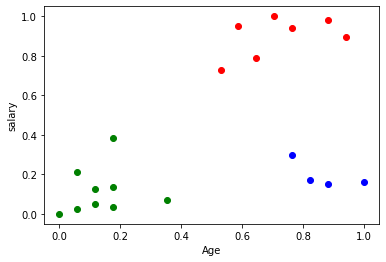

In [9]:
sal_df['cluster'] = predicted

sal_df1 = sal_df[sal_df.cluster==0]
sal_df2 = sal_df[sal_df.cluster==1]
sal_df3 = sal_df[sal_df.cluster==2]

plt.scatter(sal_df1.Age, sal_df1['Salary'], color='green')
plt.scatter(sal_df2.Age, sal_df2['Salary'], color='red')
plt.scatter(sal_df3.Age, sal_df3['Salary'], color='blue')

plt.xlabel('Age')
plt.ylabel('salary')

In [10]:
km.cluster_centers_

array([[0.1372549 , 0.11585945],
       [0.72268908, 0.8974359 ],
       [0.86764706, 0.1965812 ]])